In [1]:
# Colab / Notebook cell 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("="*80)
print("CAR SELLING PRICE PREDICTION AND ANALYSIS")
print("="*80)


CAR SELLING PRICE PREDICTION AND ANALYSIS


In [2]:
# Colab / Notebook cell 2
print("\n[STEP 1] Loading Dataset...")
df = pd.read_csv('car.csv')   # update path if needed
print("Dataset loaded successfully!")
print(f"Total records: {len(df)}")
print(f"Total features: {len(df.columns)}")
print(f"\nColumns: {df.columns.tolist()}")

print("\n[STEP 2] Data Exploration...")
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Information:")
print(df.info())

print("\nStatistical Summary:")
display(df.describe(include='all').T)

print("\nMissing Values (per column):")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found.")
print(f"\nTotal missing values: {missing.sum()}")

print("\nDuplicate Records:", df.duplicated().sum())

print("\nData Types:")
print(df.dtypes)

print("\nUnique Values in Categorical Columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"  {col}: {df[col].nunique()} unique values -> {df[col].unique()[:10]}{'...' if df[col].nunique()>10 else ''}")



[STEP 1] Loading Dataset...
Dataset loaded successfully!
Total records: 301
Total features: 9

Columns: ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

[STEP 2] Data Exploration...

First 5 rows:


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None

Statistical Summary:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Car_Name,301,98,city,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,301.0,NaN,NaN,NaN,2013.627907,2.891554,2003.0,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,NaN,NaN,NaN,4.661296,5.082812,0.1,0.9,3.6,6.0,35.0
Present_Price,301.0,NaN,NaN,NaN,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,NaN,NaN,NaN,36947.20598,38886.883882,500.0,15000.0,32000.0,48767.0,500000.0
Fuel_Type,301,3,Petrol,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seller_Type,301,2,Dealer,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,301,2,Manual,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner,301.0,NaN,NaN,NaN,0.043189,0.247915,0.0,0.0,0.0,0.0,3.0



Missing Values (per column):
No missing values found.

Total missing values: 0

Duplicate Records: 2

Data Types:
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

Unique Values in Categorical Columns:
  Car_Name: 98 unique values -> ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire']...
  Fuel_Type: 3 unique values -> ['Petrol' 'Diesel' 'CNG']
  Seller_Type: 2 unique values -> ['Dealer' 'Individual']
  Transmission: 2 unique values -> ['Manual' 'Automatic']



[STEP 3] Data Visualization...
Visualizations saved as 'data_visualization.png'


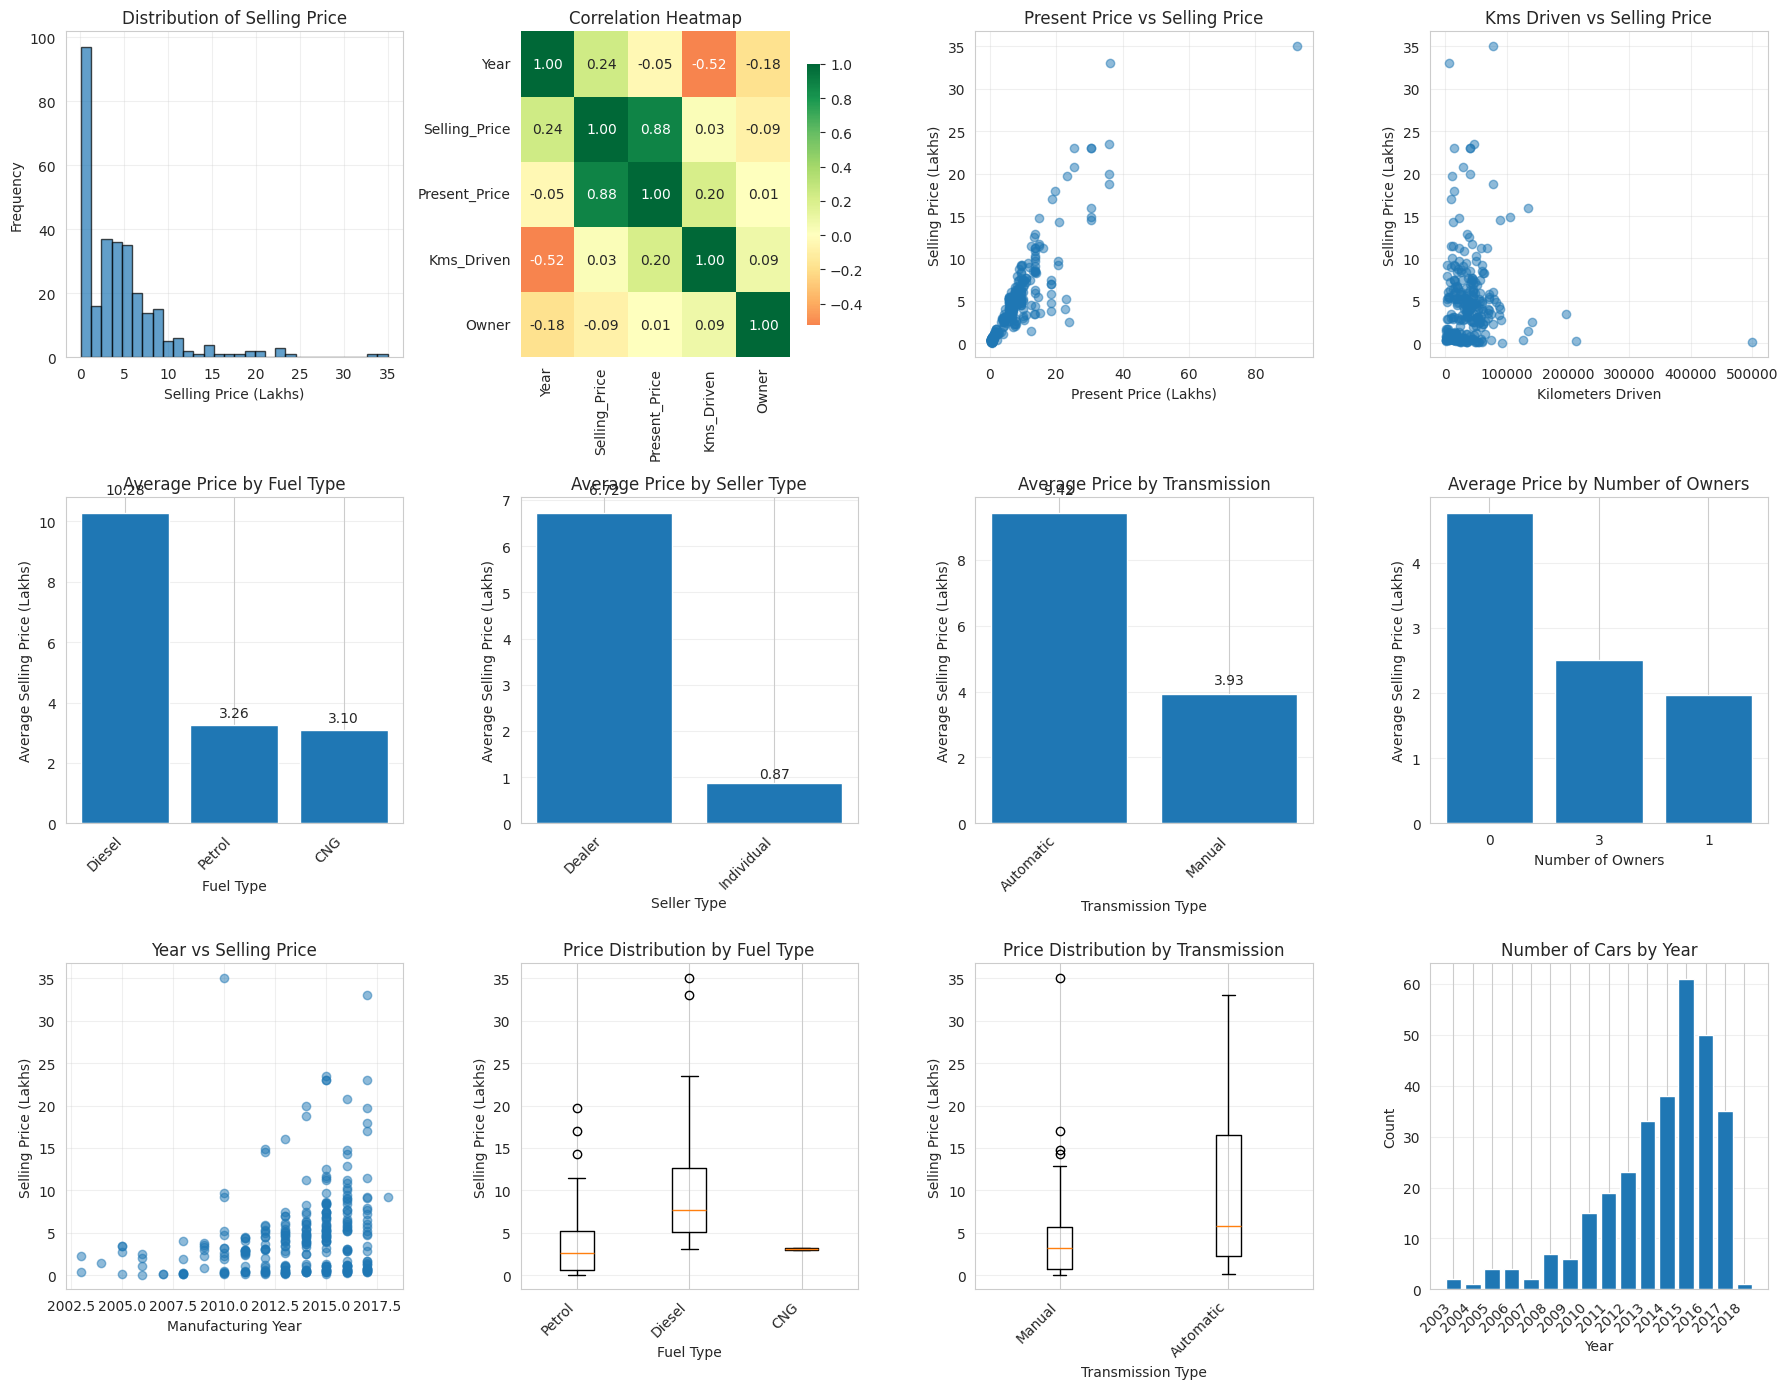

In [5]:
# Colab / Notebook cell 3
print("\n[STEP 3] Data Visualization...")
fig = plt.figure(figsize=(18, 14))

# 1 Distribution of Selling_Price
plt.subplot(3, 4, 1)
if 'Selling_Price' in df.columns:
    plt.hist(df['Selling_Price'].dropna(), bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel('Selling Price (Lakhs)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Selling Price')
    plt.grid(alpha=0.3)
elif 'Selling_Price' not in df.columns:
    plt.text(0.5, 0.5, 'Selling_Price not found', ha='center')

# 2 Correlation heatmap for numeric columns
plt.subplot(3, 4, 2)
numerical_cols = df.select_dtypes(include=[np.number]).columns
if len(numerical_cols) >= 2:
    correlation = df[numerical_cols].corr()
    sns.heatmap(correlation, annot=True, fmt='.2f', cmap='RdYlGn', center=0, cbar_kws={'shrink': 0.8})
    plt.title('Correlation Heatmap')
else:
    plt.text(0.5, 0.5, 'Not enough numeric cols', ha='center')

# 3 Present_Price vs Selling_Price
plt.subplot(3, 4, 3)
if {'Present_Price','Selling_Price'}.issubset(df.columns):
    plt.scatter(df['Present_Price'], df['Selling_Price'], alpha=0.5)
    plt.xlabel('Present Price (Lakhs)')
    plt.ylabel('Selling Price (Lakhs)')
    plt.title('Present Price vs Selling Price')
    plt.grid(alpha=0.3)

# 4 Kms_Driven vs Selling_Price
plt.subplot(3, 4, 4)
if {'Kms_Driven','Selling_Price'}.issubset(df.columns):
    plt.scatter(df['Kms_Driven'], df['Selling_Price'], alpha=0.5)
    plt.xlabel('Kilometers Driven')
    plt.ylabel('Selling Price (Lakhs)')
    plt.title('Kms Driven vs Selling Price')
    plt.grid(alpha=0.3)

# 5 Average price by Fuel_Type
plt.subplot(3, 4, 5)
if 'Fuel_Type' in df.columns and 'Selling_Price' in df.columns:
    fuel_price = df.groupby('Fuel_Type')['Selling_Price'].mean().sort_values(ascending=False)
    bars = plt.bar(range(len(fuel_price)), fuel_price.values)
    plt.xticks(range(len(fuel_price)), fuel_price.index, rotation=45, ha='right')
    plt.xlabel('Fuel Type')
    plt.ylabel('Average Selling Price (Lakhs)')
    plt.title('Average Price by Fuel Type')
    plt.grid(alpha=0.3, axis='y')
    for i, v in enumerate(fuel_price.values):
        plt.text(i, v + 0.05*max(1, v), f'{v:.2f}', ha='center', va='bottom')

# 6 Average price by Seller_Type
plt.subplot(3, 4, 6)
if 'Seller_Type' in df.columns and 'Selling_Price' in df.columns:
    seller_price = df.groupby('Seller_Type')['Selling_Price'].mean().sort_values(ascending=False)
    bars = plt.bar(range(len(seller_price)), seller_price.values)
    plt.xticks(range(len(seller_price)), seller_price.index, rotation=45, ha='right')
    plt.xlabel('Seller Type')
    plt.ylabel('Average Selling Price (Lakhs)')
    plt.title('Average Price by Seller Type')
    plt.grid(alpha=0.3, axis='y')
    for i, v in enumerate(seller_price.values):
        plt.text(i, v + 0.05*max(1, v), f'{v:.2f}', ha='center', va='bottom')

# 7 Average price by Transmission
plt.subplot(3, 4, 7)
if 'Transmission' in df.columns and 'Selling_Price' in df.columns:
    trans_price = df.groupby('Transmission')['Selling_Price'].mean().sort_values(ascending=False)
    bars = plt.bar(range(len(trans_price)), trans_price.values)
    plt.xticks(range(len(trans_price)), trans_price.index, rotation=45, ha='right')
    plt.xlabel('Transmission Type')
    plt.ylabel('Average Selling Price (Lakhs)')
    plt.title('Average Price by Transmission')
    plt.grid(alpha=0.3, axis='y')
    for i, v in enumerate(trans_price.values):
        plt.text(i, v + 0.05*max(1, v), f'{v:.2f}', ha='center', va='bottom')

# 8 Average price by Owner (if exists)
plt.subplot(3, 4, 8)
if 'Owner' in df.columns and 'Selling_Price' in df.columns:
    owner_price = df.groupby('Owner')['Selling_Price'].mean().sort_values(ascending=False)
    plt.bar(range(len(owner_price)), owner_price.values)
    plt.xticks(range(len(owner_price)), owner_price.index, rotation=0)
    plt.xlabel('Number of Owners')
    plt.ylabel('Average Selling Price (Lakhs)')
    plt.title('Average Price by Number of Owners')
    plt.grid(alpha=0.3, axis='y')

# 9 Year vs Selling_Price scatter
plt.subplot(3, 4, 9)
if {'Year','Selling_Price'}.issubset(df.columns):
    plt.scatter(df['Year'], df['Selling_Price'], alpha=0.5)
    plt.xlabel('Manufacturing Year')
    plt.ylabel('Selling Price (Lakhs)')
    plt.title('Year vs Selling Price')
    plt.grid(alpha=0.3)

# 10 Price distribution by Fuel Type (boxplot)
plt.subplot(3, 4, 10)
if 'Fuel_Type' in df.columns and 'Selling_Price' in df.columns:
    groups = [df[df['Fuel_Type']==ft]['Selling_Price'].dropna().values for ft in df['Fuel_Type'].unique()]
    plt.boxplot(groups, labels=df['Fuel_Type'].unique())
    plt.xlabel('Fuel Type')
    plt.ylabel('Selling Price (Lakhs)')
    plt.title('Price Distribution by Fuel Type')
    plt.xticks(rotation=45, ha='right')
    plt.grid(alpha=0.3, axis='y')

# 11 Price distribution by Transmission (boxplot)
plt.subplot(3, 4, 11)
if 'Transmission' in df.columns and 'Selling_Price' in df.columns:
    groups = [df[df['Transmission']==t]['Selling_Price'].dropna().values for t in df['Transmission'].unique()]
    plt.boxplot(groups, labels=df['Transmission'].unique())
    plt.xlabel('Transmission Type')
    plt.ylabel('Selling Price (Lakhs)')
    plt.title('Price Distribution by Transmission')
    plt.xticks(rotation=45, ha='right')
    plt.grid(alpha=0.3, axis='y')

# 12 Count of cars by Year
plt.subplot(3, 4, 12)
if 'Year' in df.columns:
    year_counts = df['Year'].value_counts().sort_index()
    plt.bar(year_counts.index.astype(str), year_counts.values)
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title('Number of Cars by Year')
    plt.xticks(rotation=45, ha='right')
    plt.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('data_visualization.png', dpi=300, bbox_inches='tight')
print("Visualizations saved as 'data_visualization.png'")
plt.show()


In [7]:
# Colab / Notebook cell 4
print("\n[STEP 4] Data Preprocessing...")
df_processed = df.copy()

# Handle missing values: simple drop for now, but you can change to imputation if desired
print("\nHandling Missing Values...")
before_missing = df_processed.isnull().sum().sum()
df_processed = df_processed.dropna()
after_missing = df_processed.isnull().sum().sum()
print(f"  Total missing values before: {before_missing}")
print(f"  Total missing values after dropna: {after_missing}")
print(f"  Records after cleaning: {len(df_processed)}")

# Remove duplicates
print("\nRemoving Duplicates...")
before_dup = len(df_processed)
df_processed = df_processed.drop_duplicates()
print(f"  Duplicate records removed: {before_dup - len(df_processed)}")
print(f"  Records after removing duplicates: {len(df_processed)}")

# Feature engineering: Car_Age
print("\nFeature Engineering...")
if 'Year' in df_processed.columns:
    current_year = 2025
    df_processed['Car_Age'] = current_year - df_processed['Year']
    print(f"  Created 'Car_Age' feature (Current Year: {current_year})")
    print(f"  Car Age range: {df_processed['Car_Age'].min()} to {df_processed['Car_Age'].max()} years")

# Encoding categorical columns using LabelEncoder (store encoders)
print("\nEncoding Categorical Variables...")
label_encoders = {}
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"  {col}: {mapping}")

print(f"\nFinal Dataset Shape: {df_processed.shape}")
feature_cols = [col for col in df_processed.columns if col != 'Selling_Price']
print(f"Features used for modeling: {feature_cols}")



[STEP 4] Data Preprocessing...

Handling Missing Values...
  Total missing values before: 0
  Total missing values after dropna: 0
  Records after cleaning: 301

Removing Duplicates...
  Duplicate records removed: 2
  Records after removing duplicates: 299

Feature Engineering...
  Created 'Car_Age' feature (Current Year: 2025)
  Car Age range: 7 to 22 years

Encoding Categorical Variables...
  Car_Name: {'800': np.int64(0), 'Activa 3g': np.int64(1), 'Activa 4g': np.int64(2), 'Bajaj  ct 100': np.int64(3), 'Bajaj Avenger 150': np.int64(4), 'Bajaj Avenger 150 street': np.int64(5), 'Bajaj Avenger 220': np.int64(6), 'Bajaj Avenger 220 dtsi': np.int64(7), 'Bajaj Avenger Street 220': np.int64(8), 'Bajaj Discover 100': np.int64(9), 'Bajaj Discover 125': np.int64(10), 'Bajaj Dominar 400': np.int64(11), 'Bajaj Pulsar  NS 200': np.int64(12), 'Bajaj Pulsar 135 LS': np.int64(13), 'Bajaj Pulsar 150': np.int64(14), 'Bajaj Pulsar 220 F': np.int64(15), 'Bajaj Pulsar NS 200': np.int64(16), 'Bajaj Puls

In [8]:
# Colab / Notebook cell 5
print("\n[STEP 5] Splitting Dataset...")
X = df_processed.drop('Selling_Price', axis=1)
y = df_processed['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing set: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")
print(f"Features: {X.shape[1]}")

# Feature scaling
print("\n[STEP 6] Feature Scaling...")
scaler = StandardScaler()
# We'll only scale numeric columns. Identify numeric columns and scale them.
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numeric columns to scale: {numeric_cols}")

# Fit scaler on training numeric columns and transform
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("StandardScaler applied to numeric features.")



[STEP 5] Splitting Dataset...
Training set: 239 samples (79.9%)
Testing set: 60 samples (20.1%)
Features: 9

[STEP 6] Feature Scaling...
Numeric columns to scale: ['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Car_Age']
StandardScaler applied to numeric features.


In [10]:
# Colab / Notebook cell 6
print("\n[STEP 7] Training Machine Learning Models...")

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
}

results = {}

print("\n" + "="*80)
print("MODEL PERFORMANCE COMPARISON")
print("="*80)

for name, model in models.items():
    print(f"\nTraining {name}...")
    # For linear models use scaled data; for tree-based use unscaled (trees don't need scaling)
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_train_pred = model.predict(X_train_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    results[name] = {
        'model': model,
        'Train R2': train_r2,
        'Test R2': test_r2,
        'RMSE': rmse,
        'MAE': mae,
        'predictions': y_pred
    }

    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²:  {test_r2:.4f}")
    print(f"  RMSE:     {rmse:.4f}")
    print(f"  MAE:      {mae:.4f}")



[STEP 7] Training Machine Learning Models...

MODEL PERFORMANCE COMPARISON

Training Linear Regression...
  Train R²: 0.9032
  Test R²:  0.7353
  RMSE:     2.6121
  MAE:      1.5712

Training Ridge Regression...
  Train R²: 0.9032
  Test R²:  0.7355
  RMSE:     2.6109
  MAE:      1.5704

Training Lasso Regression...
  Train R²: 0.9008
  Test R²:  0.7516
  RMSE:     2.5301
  MAE:      1.4945

Training Decision Tree...
  Train R²: 0.9991
  Test R²:  0.6795
  RMSE:     2.8739
  MAE:      1.2886

Training Random Forest...
  Train R²: 0.9835
  Test R²:  0.5533
  RMSE:     3.3930
  MAE:      1.3541

Training Gradient Boosting...
  Train R²: 0.9998
  Test R²:  0.8028
  RMSE:     2.2547
  MAE:      1.0389



[STEP 8] Selecting Best Model...

BEST MODEL SELECTED
Model: Gradient Boosting
Test R² Score: 0.8028
RMSE: 2.2547
MAE: 1.0389

[STEP 9] Model Evaluation and Visualization...
Model evaluation plots saved as 'model_evaluation.png'


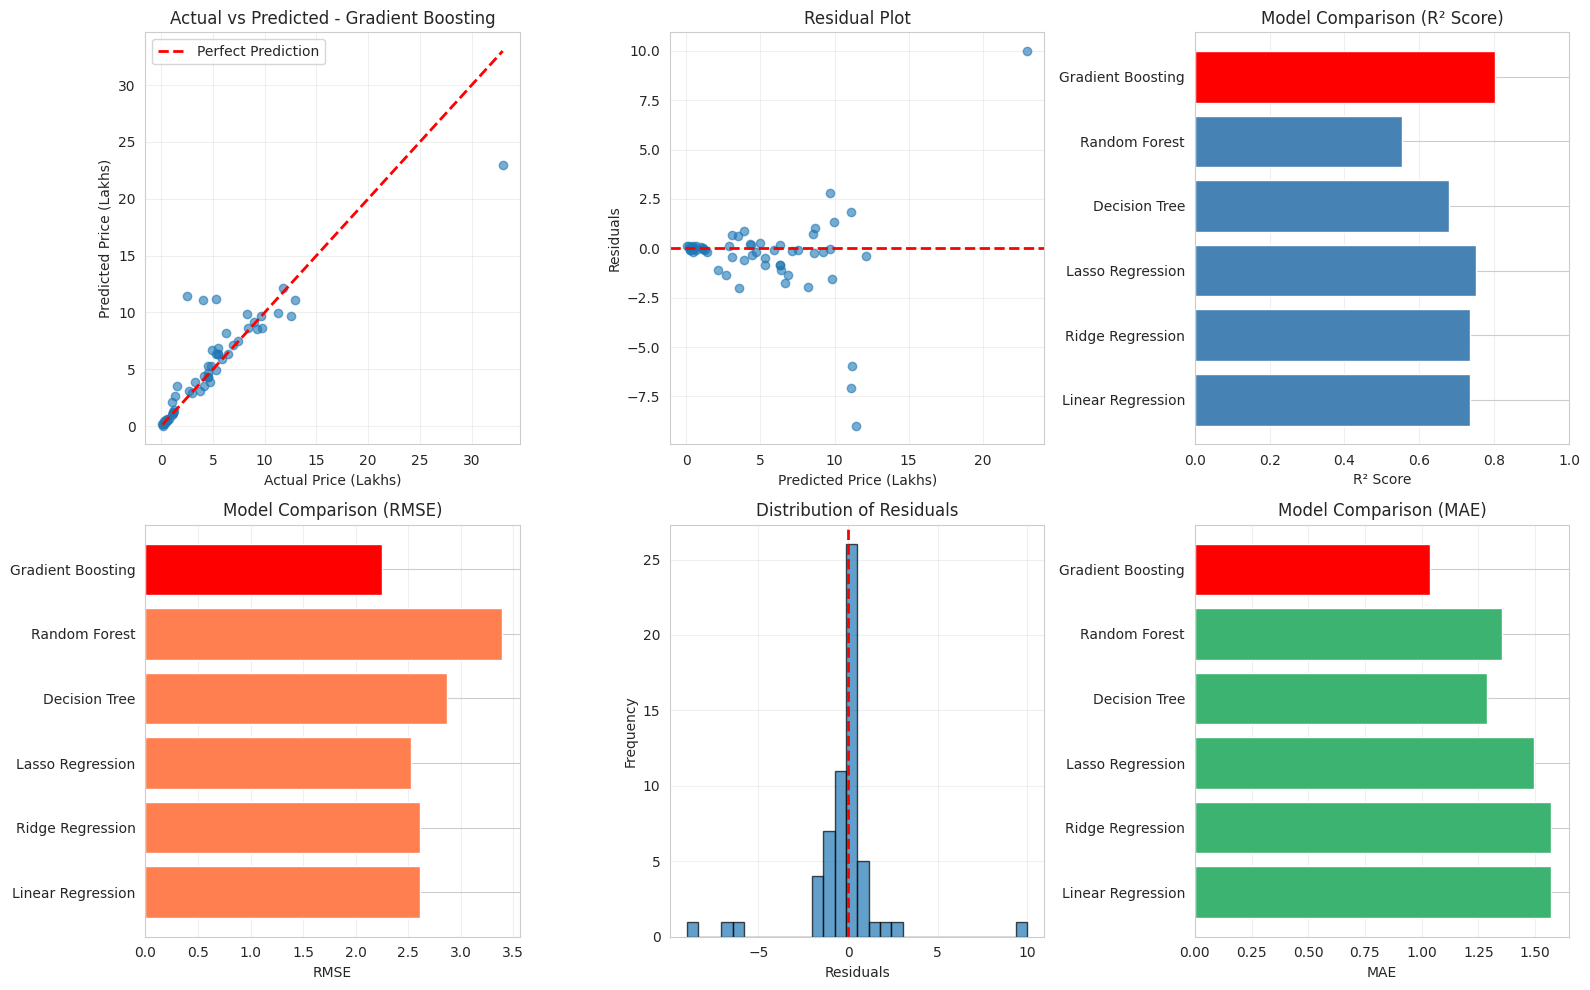

In [11]:
# Colab / Notebook cell 7
print("\n[STEP 8] Selecting Best Model...")
best_model_name = max(results, key=lambda x: results[x]['Test R2'])
best_model = results[best_model_name]['model']
best_r2 = results[best_model_name]['Test R2']
best_rmse = results[best_model_name]['RMSE']
best_mae = results[best_model_name]['MAE']

print("\n" + "="*80)
print("BEST MODEL SELECTED")
print("="*80)
print(f"Model: {best_model_name}")
print(f"Test R² Score: {best_r2:.4f}")
print(f"RMSE: {best_rmse:.4f}")
print(f"MAE: {best_mae:.4f}")
print("="*80)

# Visualization
print("\n[STEP 9] Model Evaluation and Visualization...")
best_predictions = results[best_model_name]['predictions']

fig = plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.scatter(y_test, best_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price (Lakhs)')
plt.ylabel('Predicted Price (Lakhs)')
plt.title(f'Actual vs Predicted - {best_model_name}')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(2, 3, 2)
residuals = y_test - best_predictions
plt.scatter(best_predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Price (Lakhs)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(alpha=0.3)

plt.subplot(2, 3, 3)
model_names = list(results.keys())
r2_scores = [results[name]['Test R2'] for name in model_names]
colors = ['red' if name == best_model_name else 'steelblue' for name in model_names]
plt.barh(model_names, r2_scores, color=colors)
plt.xlabel('R² Score')
plt.title('Model Comparison (R² Score)')
plt.xlim(min(0, min(r2_scores)-0.1), max(1, max(r2_scores)+0.1))
plt.grid(alpha=0.3, axis='x')

plt.subplot(2, 3, 4)
rmse_scores = [results[name]['RMSE'] for name in model_names]
colors = ['red' if name == best_model_name else 'coral' for name in model_names]
plt.barh(model_names, rmse_scores, color=colors)
plt.xlabel('RMSE')
plt.title('Model Comparison (RMSE)')
plt.grid(alpha=0.3, axis='x')

plt.subplot(2, 3, 5)
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.axvline(x=0, color='r', linestyle='--', lw=2)
plt.grid(alpha=0.3)

plt.subplot(2, 3, 6)
mae_scores = [results[name]['MAE'] for name in model_names]
colors = ['red' if name == best_model_name else 'mediumseagreen' for name in model_names]
plt.barh(model_names, mae_scores, color=colors)
plt.xlabel('MAE')
plt.title('Model Comparison (MAE)')
plt.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('model_evaluation.png', dpi=300, bbox_inches='tight')
print("Model evaluation plots saved as 'model_evaluation.png'")
plt.show()



[STEP 10] Feature Importance Analysis...

Feature Importance Ranking:
--------------------------------------------------
1. Present_Price        : 0.8918
2. Car_Age              : 0.0367
3. Year                 : 0.0324
4. Car_Name             : 0.0302
5. Kms_Driven           : 0.0055
6. Fuel_Type            : 0.0020
7. Transmission         : 0.0012
8. Seller_Type          : 0.0002
9. Owner                : 0.0000

Feature importance plot saved as 'feature_importance.png'


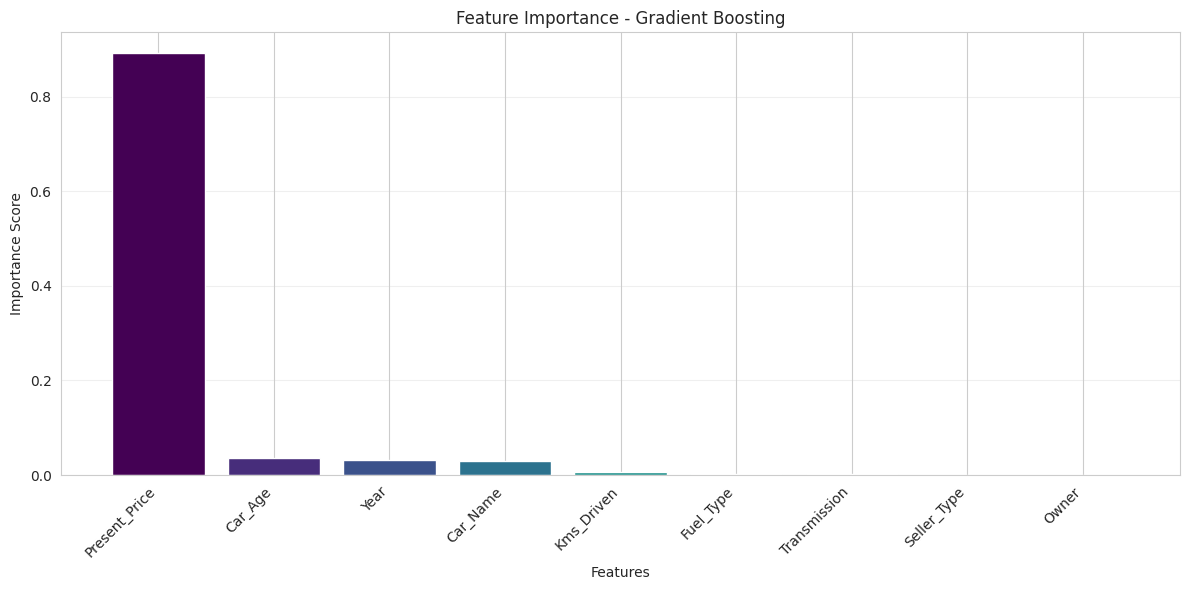


[STEP 11] Saving Model...
Model saved successfully as 'car_price_model.pkl'
Model: Gradient Boosting
Performance: R²=0.8028, RMSE=2.2547, MAE=1.0389


In [13]:
# Colab / Notebook cell 8
print("\n[STEP 10] Feature Importance Analysis...")

if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    feature_names = X.columns.to_numpy()
    indices = np.argsort(importances)[::-1]

    print("\nFeature Importance Ranking:")
    print("-" * 50)
    for i, idx in enumerate(indices):
        print(f"{i+1}. {feature_names[idx]:<20} : {importances[idx]:.4f}")

    plt.figure(figsize=(12, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(importances)))
    plt.bar(range(len(importances)), importances[indices], color=colors)
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Importance Score')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.grid(alpha=0.3, axis='y')
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    print("\nFeature importance plot saved as 'feature_importance.png'")
    plt.show()
else:
    print(f"\n{best_model_name} does not provide feature importance scores")

# Save model and artifacts
print("\n[STEP 11] Saving Model...")

model_data = {
    'model': best_model,
    'scaler': scaler,
    'label_encoders': label_encoders,
    'feature_names': X.columns.tolist(),
    'model_name': best_model_name,
    'performance': {
        'r2_score': float(best_r2),
        'rmse': float(best_rmse),
        'mae': float(best_mae)
    },
    'use_scaling': best_model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'training_date': '2025-12-03',
    'all_results': {
        name: {k: (v if k != 'predictions' else None) for k, v in data.items() if k != 'model'}
        for name, data in results.items()
    }
}

with open('car_price_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("Model saved successfully as 'car_price_model.pkl'")
print(f"Model: {best_model_name}")
print(f"Performance: R²={best_r2:.4f}, RMSE={best_rmse:.4f}, MAE={best_mae:.4f}")


In [15]:
# Colab / Notebook cell 9
print("\n[STEP 12] Building Prediction System...")

def predict_car_price(fuel_type, year, present_price, kms_driven, owner, seller_type, transmission):
    """
    Predict car selling price

    Parameters:
        - fuel_type: str (e.g., 'Petrol', 'Diesel', 'CNG')
        - year: int (Manufacturing year, e.g., 2015)
        - present_price: float (Current showroom price in lakhs)
        - kms_driven: int (Kilometers driven)
        - owner: int (Number of previous owners: 0, 1, 2, 3)
        - seller_type: str ('Dealer' or 'Individual')
        - transmission: str ('Manual' or 'Automatic')

    Returns:
        - predicted_price: float (Predicted selling price in lakhs)
    """
    with open('car_price_model.pkl', 'rb') as f:
        model_data = pickle.load(f)

    model = model_data['model']
    scaler = model_data['scaler']
    label_encoders = model_data['label_encoders']
    feature_names = model_data['feature_names']
    use_scaling = model_data['use_scaling']

    car_age = 2025 - int(year)

    # encode categorical features, handle unseen categories by raising a clear error
    try:
        fuel_encoded = label_encoders['Fuel_Type'].transform([fuel_type])[0] if 'Fuel_Type' in label_encoders else fuel_type
    except Exception as e:
        raise ValueError(f"Fuel_Type value '{fuel_type}' not seen during training.") from e

    try:
        seller_encoded = label_encoders['Seller_Type'].transform([seller_type])[0] if 'Seller_Type' in label_encoders else seller_type
    except Exception as e:
        raise ValueError(f"Seller_Type value '{seller_type}' not seen during training.") from e

    try:
        transmission_encoded = label_encoders['Transmission'].transform([transmission])[0] if 'Transmission' in label_encoders else transmission
    except Exception as e:
        raise ValueError(f"Transmission value '{transmission}' not seen during training.") from e

    input_dict = {
        'Year': int(year),
        'Present_Price': float(present_price),
        'Kms_Driven': int(kms_driven),
        'Fuel_Type': int(fuel_encoded) if isinstance(fuel_encoded, (np.integer, int)) else fuel_encoded,
        'Seller_Type': int(seller_encoded) if isinstance(seller_encoded, (np.integer, int)) else seller_encoded,
        'Transmission': int(transmission_encoded) if isinstance(transmission_encoded, (np.integer, int)) else transmission_encoded,
        'Owner': int(owner),
        'Car_Age': int(car_age)
    }

    # build feature vector in correct order
    input_features = [input_dict.get(feature, 0) for feature in feature_names]
    features = np.array(input_features).reshape(1, -1)

    if use_scaling:
        # apply scaler only to numeric columns — scaler was fit on numeric columns originally
        # but we stored a full scaler; to be safe, transform entire array (same shape) here
        features = scaler.transform(features)

    prediction = model.predict(features)[0]
    return float(prediction)

print("Prediction function created successfully")

# STEP 13: Testing prediction system with example cases
print("\n[STEP 13] Testing Prediction System...")

test_cases = [
    {
        'fuel_type': 'Petrol',
        'year': 2015,
        'present_price': 5.59,
        'kms_driven': 27000,
        'owner': 0,
        'seller_type': 'Dealer',
        'transmission': 'Manual'
    },
    {
        'fuel_type': 'Diesel',
        'year': 2017,
        'present_price': 9.85,
        'kms_driven': 45000,
        'owner': 0,
        'seller_type': 'Dealer',
        'transmission': 'Automatic'
    },
    {
        'fuel_type': 'Petrol',
        'year': 2012,
        'present_price': 4.15,
        'kms_driven': 65000,
        'owner': 1,
        'seller_type': 'Individual',
        'transmission': 'Manual'
    }
]

for i, test_case in enumerate(test_cases, 1):
    print(f"\nTest Case {i}:")
    print("-" * 50)
    print(f"  Fuel Type: {test_case['fuel_type']}")
    print(f"  Manufacturing Year: {test_case['year']}")
    print(f"  Showroom Price: ₹{test_case['present_price']} lakhs")
    print(f"  Kilometers Driven: {test_case['kms_driven']:,} km")
    print(f"  Number of Owners: {test_case['owner']}")
    print(f"  Seller Type: {test_case['seller_type']}")
    print(f"  Transmission: {test_case['transmission']}")

    try:
        predicted_price = predict_car_price(
            fuel_type=test_case['fuel_type'],
            year=test_case['year'],
            present_price=test_case['present_price'],
            kms_driven=test_case['kms_driven'],
            owner=test_case['owner'],
            seller_type=test_case['seller_type'],
            transmission=test_case['transmission']
        )
        print(f"\n  🚗 Predicted Selling Price: ₹{predicted_price:.2f} lakhs")
    except Exception as ex:
        print(f"  Error while predicting: {ex}")



[STEP 12] Building Prediction System...
Prediction function created successfully

[STEP 13] Testing Prediction System...

Test Case 1:
--------------------------------------------------
  Fuel Type: Petrol
  Manufacturing Year: 2015
  Showroom Price: ₹5.59 lakhs
  Kilometers Driven: 27,000 km
  Number of Owners: 0
  Seller Type: Dealer
  Transmission: Manual

  🚗 Predicted Selling Price: ₹3.02 lakhs

Test Case 2:
--------------------------------------------------
  Fuel Type: Diesel
  Manufacturing Year: 2017
  Showroom Price: ₹9.85 lakhs
  Kilometers Driven: 45,000 km
  Number of Owners: 0
  Seller Type: Dealer
  Transmission: Automatic

  🚗 Predicted Selling Price: ₹8.31 lakhs

Test Case 3:
--------------------------------------------------
  Fuel Type: Petrol
  Manufacturing Year: 2012
  Showroom Price: ₹4.15 lakhs
  Kilometers Driven: 65,000 km
  Number of Owners: 1
  Seller Type: Individual
  Transmission: Manual

  🚗 Predicted Selling Price: ₹2.17 lakhs


In [16]:
# Colab / Notebook cell 10
print("\n" + "="*80)
print("PROJECT SUMMARY")
print("="*80)

print(f"\n✓ Dataset: {len(df)} records, {len(df.columns)} features")
print(f"✓ Features Used: {', '.join([col for col in X.columns])}")
print(f"✓ Models Trained: {len(models)}")
print(f"✓ Best Model: {best_model_name}")
print(f"✓ Model Performance:")
print(f"    - R² Score: {best_r2:.4f}")
print(f"    - RMSE: {best_rmse:.4f}")
print(f"    - MAE: {best_mae:.4f}")
print(f"✓ Model Saved: car_price_model.pkl")
print(f"✓ Prediction Function: predict_car_price()")

print("\n" + "="*80)
print("DEPLOYMENT READY!")
print("="*80)
print("\nThe system can now predict car selling prices based on:")
print("  1. Fuel Type")
print("  2. Years of Service (Car Age)")
print("  3. Showroom Price (Present Price)")
print("  4. Number of Previous Owners")
print("  5. Kilometers Driven")
print("  6. Seller Type (Dealer/Individual)")
print("  7. Transmission Type (Manual/Automatic)")
print("\nUse predict_car_price() function for new predictions!")
print("="*80)



PROJECT SUMMARY

✓ Dataset: 301 records, 9 features
✓ Features Used: Car_Name, Year, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner, Car_Age
✓ Models Trained: 6
✓ Best Model: Gradient Boosting
✓ Model Performance:
    - R² Score: 0.8028
    - RMSE: 2.2547
    - MAE: 1.0389
✓ Model Saved: car_price_model.pkl
✓ Prediction Function: predict_car_price()

DEPLOYMENT READY!

The system can now predict car selling prices based on:
  1. Fuel Type
  2. Years of Service (Car Age)
  3. Showroom Price (Present Price)
  4. Number of Previous Owners
  5. Kilometers Driven
  6. Seller Type (Dealer/Individual)
  7. Transmission Type (Manual/Automatic)

Use predict_car_price() function for new predictions!
